## Source

http://excamera.com/sphinx/article-chebyshev.html

https://stackoverflow.com/questions/32163523/generating-the-coefficients-of-a-chebyshev-polynomial-in-python

In [1]:
import math
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
import math
from math import exp

plt.style.use("ggplot")

x = sy.Symbol('x')

def runge(x):
    return 1/(1+25*x**2)

def cheb(n,x):
    cz = np.polynomial.chebyshev.Chebyshev((int(0==n),int(1==n),int(2==n),int(3==n),int(4==n),int(5==n),int(6==n),int(7==n),int(8==n),int(9==n),int(10==n)))
    return cz(x)


C:\Users\adamw\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


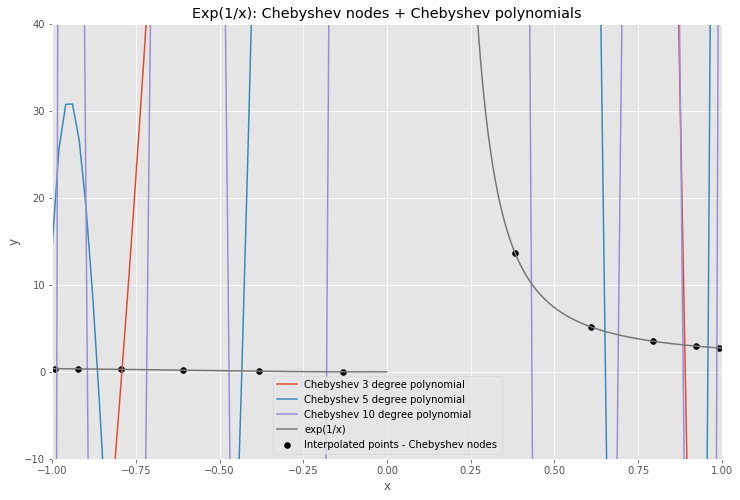

In [3]:
# Plot the rung function
x_fe = np.linspace(-1,1,800)
y_fe = np.exp(1/x_fe)


#Chebyshev Regression
for n in [3,5,10]:

    m = 12 # num of chebyshev nodes

    #Step 1 Compute the m ≥ n + 1 Chebyshev interpolation nodes in [−1, 1]:
    x1 = np.zeros(m)
    k=1
    while k <= m:
        x1[k-1] = math.cos((2*k-1)/(2*m)*math.pi)
        k += 1

    #Step 2 Adjust the nodes to the [a, b] interval:

    #Step 3 Evaluate f at the approximation nodes: wk = f (xk ), k = 1, ..., m.
    y1 = np.exp(1/x1)
 
    #Step 4 Compute Chebyshev coefficients, theta(i), associated with Chebyshev basis i = 0, ..., n:
    theta = np.zeros(n+1)

    for i in range(n+1):
        sumNom = 0
        sumDen = 0
        for k in range(m):
            sumNom = sumNom + sy.exp(1/x1[k])*cheb(i,x1[k])
            sumDen = sumDen + cheb(i,x1[k])*cheb(i,x1[k])
        theta[i] = sumNom/sumDen

    #to arrive at the approximation for f (x), x ∈ [a, b]:
    X = np.linspace(-1,1,100)
    Y = np.zeros(100)

    for c in range(100):
        f=0
        for i in range(n+1):
             f = f + theta[i]*cheb(i, X[c])
        Y[c] = f

    plt.plot(X,Y,label='Chebyshev ' + str(n) + ' degree polynomial')
# Plot the function
plt.plot(x_fe,y_fe,label='exp(1/x)')

    
plt.scatter(x1,y1, c= 'black', label='Interpolated points - Chebyshev nodes')
plt.xlim([-1,1])
plt.ylim([-10,40])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Exp(1/x): Chebyshev nodes + Chebyshev polynomials')
plt.rcParams["figure.figsize"] = (12,8)

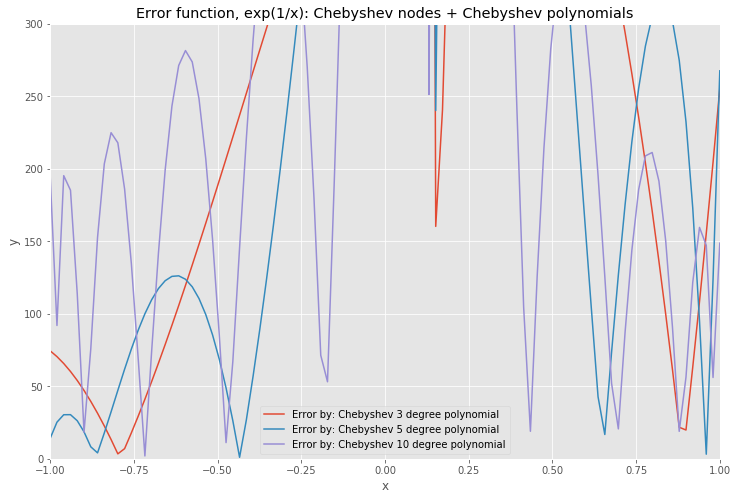

In [4]:
# Plot the error of rung function approximation
x_fe = np.linspace(-1,1,100)
y_fe = np.exp(1/x_fe)
# Plot the function
#plt.plot(x_fe,y_fe,label='exp(1/x)')

#Chebyshev Regression
for n in [3,5,10]:
    #calculate theta's
    #n = 10 # degree of the chebyshev polynomial
    m = 12 # num of chebyshev nodes

    #Step 1 Compute the m ≥ n + 1 Chebyshev interpolation nodes in [−1, 1]:
    x1 = np.zeros(m)
    k=1
    while k <= m:
        x1[k-1] = math.cos((2*k-1)/(2*m)*math.pi)
        k += 1

    #Step 2 Adjust the nodes to the [a, b] interval:

    #Step 3 Evaluate f at the approximation nodes: wk = f (xk ), k = 1, ..., m.
    y1 = np.exp(1/x1)
 
    #Step 4 Compute Chebyshev coefficients, theta(i), associated with Chebyshev basis i = 0, ..., n:
    theta = np.zeros(n+1)

    for i in range(n+1):
        sumNom = 0
        sumDen = 0
        for k in range(m):
            sumNom = sumNom + sy.exp(1/x1[k])*cheb(i,x1[k])
            sumDen = sumDen + cheb(i,x1[k])*cheb(i,x1[k])
        theta[i] = sumNom/sumDen

    #to arrive at the approximation for f (x), x ∈ [a, b]:
    X = np.linspace(-1,1,100)
    Y = np.zeros(100)

    for c in range(100):
        f=0
        for i in range(n+1):
             f = f + theta[i]*cheb(i, X[c])
        Y[c] = f

    plt.plot(X,abs(y_fe - Y),label='Error by: Chebyshev ' + str(n) + ' degree polynomial')


    
#plt.scatter(x1,y1, c= 'black', label='Interpolated points - Chebyshev nodes')
plt.xlim([-1,1])
plt.ylim([0,300])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Error function, exp(1/x): Chebyshev nodes + Chebyshev polynomials')
plt.rcParams["figure.figsize"] = (12,6)

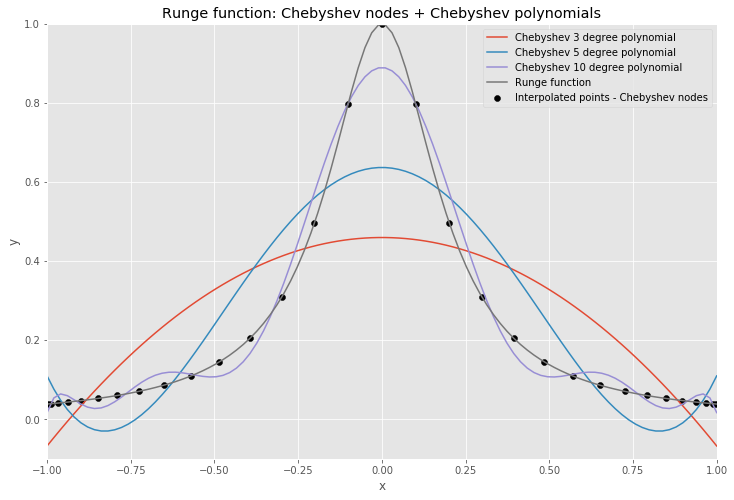

In [6]:
# Plot the rung function
x_runge = np.linspace(-1,1,100)
y_runge = 1/(1+25*x_runge**2)


#Chebyshev Regression
for n in [3,5,10]:
    #calculate theta's
    #n = 10 # degree of the chebyshev polynomial
    m = 31 # num of chebyshev nodes

    #Step 1 Compute the m ≥ n + 1 Chebyshev interpolation nodes in [−1, 1]:
    x1 = np.zeros(m)
    k=1
    while k <= m:
        x1[k-1] = math.cos((2*k-1)/(2*m)*math.pi)
        k += 1

    #Step 2 Adjust the nodes to the [a, b] interval:

    #Step 3 Evaluate f at the approximation nodes: wk = f (xk ), k = 1, ..., m.
    y1 = 1/(1+25*x1**2)
 
    #Step 4 Compute Chebyshev coefficients, theta(i), associated with Chebyshev basis i = 0, ..., n:
    theta = np.zeros(n+1)

    for i in range(n+1):
        sumNom = 0
        sumDen = 0
        for k in range(m):
            sumNom = sumNom + y1[k]*cheb(i,x1[k])
            sumDen = sumDen + cheb(i,x1[k])*cheb(i,x1[k])
        theta[i] = sumNom/sumDen

    #to arrive at the approximation for f (x), x ∈ [a, b]:
    X = np.linspace(-1,1,100)
    Y = np.zeros(100)

    for c in range(100):
        f=0
        for i in range(n+1):
             f = f + theta[i]*cheb(i, X[c])
        Y[c] = f

    plt.plot(X,Y,label='Chebyshev ' + str(n) + ' degree polynomial')


plt.plot(x_runge,y_runge,label='Runge function')
plt.scatter(x1,y1, c= 'black', label='Interpolated points - Chebyshev nodes')
plt.xlim([-1,1])
plt.ylim([-0.1,1])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Runge function: Chebyshev nodes + Chebyshev polynomials')
plt.rcParams["figure.figsize"] = (12,8)

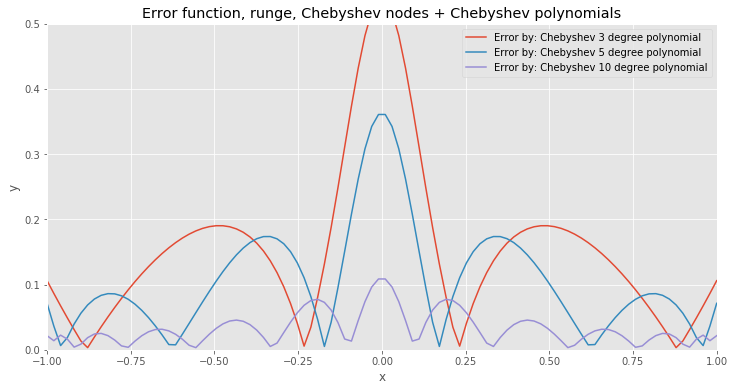

In [8]:
# Plot the error of rung function approximation
x_runge = np.linspace(-1,1,100)
y_runge = 1/(1+25*x_runge**2)
#plt.plot(x_runge,y_runge,label='Runge function')

#Chebyshev Regression
for n in [3,5,10]:
    #calculate theta's
    #n = 10 # degree of the chebyshev polynomial
    m = 31 # num of chebyshev nodes

    #Step 1 Compute the m ≥ n + 1 Chebyshev interpolation nodes in [−1, 1]:
    x1 = np.zeros(m)
    k=1
    while k <= m:
        x1[k-1] = math.cos((2*k-1)/(2*m)*math.pi)
        k += 1

    #Step 2 Adjust the nodes to the [a, b] interval:

    #Step 3 Evaluate f at the approximation nodes: wk = f (xk ), k = 1, ..., m.
    y1 = 1/(1+25*x1**2)
 
    #Step 4 Compute Chebyshev coefficients, theta(i), associated with Chebyshev basis i = 0, ..., n:
    theta = np.zeros(n+1)

    for i in range(n+1):
        sumNom = 0
        sumDen = 0
        for k in range(m):
            sumNom = sumNom + y1[k]*cheb(i,x1[k])
            sumDen = sumDen + cheb(i,x1[k])*cheb(i,x1[k])
        theta[i] = sumNom/sumDen

    #to arrive at the approximation for f (x), x ∈ [a, b]:
    X = np.linspace(-1,1,100)
    Y = np.zeros(100)

    for c in range(100):
        f=0
        for i in range(n+1):
             f = f + theta[i]*cheb(i, X[c])
        Y[c] = f

    plt.plot(X,abs(y_runge-Y),label='Error by: Chebyshev ' + str(n) + ' degree polynomial')



#plt.scatter(x1,y1, c= 'black', label='Interpolated points - Chebyshev nodes')
plt.xlim([-1,1])
plt.ylim([0,0.5])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Error function, runge, Chebyshev nodes + Chebyshev polynomials')
plt.rcParams["figure.figsize"] = (12,6)

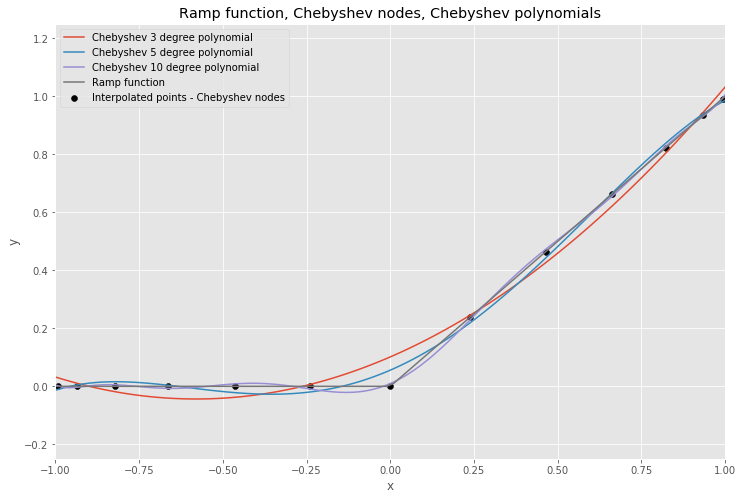

In [10]:
# Plot the rung function
x_ramp = np.linspace(-1,1,100)
y_ramp = (x_ramp+abs(x_ramp))/2


#Chebyshev Regression
for n in [3,5,10]:
    #calculate theta's
    #n = 10 # degree of the chebyshev polynomial
    m = 13 # num of chebyshev nodes

    #Step 1 Compute the m ≥ n + 1 Chebyshev interpolation nodes in [−1, 1]:
    x1 = np.zeros(m)
    k=1
    while k <= m:
        x1[k-1] = math.cos((2*k-1)/(2*m)*math.pi)
        k += 1

    #Step 2 Adjust the nodes to the [a, b] interval:

    #Step 3 Evaluate f at the approximation nodes: wk = f (xk ), k = 1, ..., m.
    y1 = (x1+abs(x1))/2
 
    #Step 4 Compute Chebyshev coefficients, theta(i), associated with Chebyshev basis i = 0, ..., n:
    theta = np.zeros(n+1)

    for i in range(n+1):
        sumNom = 0
        sumDen = 0
        for k in range(m):
            sumNom = sumNom + y1[k]*cheb(i,x1[k])
            sumDen = sumDen + cheb(i,x1[k])*cheb(i,x1[k])
        theta[i] = sumNom/sumDen

    #to arrive at the approximation for f (x), x ∈ [a, b]:
    X = np.linspace(-1,1,100)
    Y = np.zeros(100)

    for c in range(100):
        f=0
        for i in range(n+1):
             f = f + theta[i]*cheb(i, X[c])
        Y[c] = f

    plt.plot(X,Y,label='Chebyshev ' + str(n) + ' degree polynomial')

plt.plot(x_ramp,y_ramp,label='Ramp function')

plt.scatter(x1,y1, c= 'black', label='Interpolated points - Chebyshev nodes')
plt.xlim([-1,1])
plt.ylim([-0.25,1.25])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Ramp function, Chebyshev nodes, Chebyshev polynomials')
plt.rcParams["figure.figsize"] = (12,8)

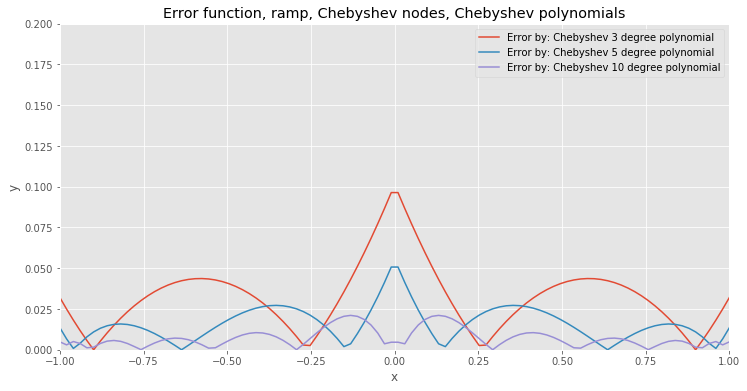

In [27]:
# Plot the rung function
x_ramp = np.linspace(-1,1,100)
y_ramp = (x_ramp+abs(x_ramp))/2
#plt.plot(x_ramp,y_ramp,label='Ramp function')

#Chebyshev Regression
for n in [3,5,10]:
    #calculate theta's
    #n = 10 # degree of the chebyshev polynomial
    m = 13 # num of chebyshev nodes

    #Step 1 Compute the m ≥ n + 1 Chebyshev interpolation nodes in [−1, 1]:
    x1 = np.zeros(m)
    k=1
    while k <= m:
        x1[k-1] = math.cos((2*k-1)/(2*m)*math.pi)
        k += 1

    #Step 2 Adjust the nodes to the [a, b] interval:

    #Step 3 Evaluate f at the approximation nodes: wk = f (xk ), k = 1, ..., m.
    y1 = (x1+abs(x1))/2
 
    #Step 4 Compute Chebyshev coefficients, theta(i), associated with Chebyshev basis i = 0, ..., n:
    theta = np.zeros(n+1)

    for i in range(n+1):
        sumNom = 0
        sumDen = 0
        for k in range(m):
            sumNom = sumNom + y1[k]*cheb(i,x1[k])
            sumDen = sumDen + cheb(i,x1[k])*cheb(i,x1[k])
        theta[i] = sumNom/sumDen

    #to arrive at the approximation for f (x), x ∈ [a, b]:
    X = np.linspace(-1,1,100)
    Y = np.zeros(100)

    for c in range(100):
        f=0
        for i in range(n+1):
             f = f + theta[i]*cheb(i, X[c])
        Y[c] = f

    plt.plot(X,abs(y_ramp-Y),label='Error by: Chebyshev ' + str(n) + ' degree polynomial')



#plt.scatter(x1,y1, c= 'black', label='Interpolated points - Chebyshev nodes')
plt.xlim([-1,1])
plt.ylim([0,0.2])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Error function, ramp, Chebyshev nodes, Chebyshev polynomials')
plt.rcParams["figure.figsize"] = (12,6)